# DESCRIPTION

## Objective: Make a model to predict the app rating, with other information about the app provided.

### Problem Statement:

Google Play Store team is about to launch a new feature wherein, certain apps that are promising, are boosted in visibility. The boost will manifest in multiple ways including higher priority in recommendations sections (“Similar apps”, “You might also like”, “New and updated games”). These will also get a boost in search results visibility.  This feature will help bring more attention to newer apps that have the potential.

### Domain: General

Analysis to be done: The problem is to identify the apps that are going to be good for Google to promote. App ratings, which are provided by the customers, is always a great indicator of the goodness of the app. The problem reduces to: predict which apps will have high ratings.

## <u>•Note:</u> I am writing to apologize for not adhering to the given format and using my own variable names in the code that I submitted. I understand that this may cause confusion and make it difficult for you to review my work accurately.•

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Steps to perform:

## 1. Load the data file using pandas. 

In [2]:
inp0 = pd.read_csv("googleplaystore.csv")

In [3]:
inp0.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


## 2. Check for null values in the data. Get the number of null values for each column.

Dropping the records with null ratings
- this is done because ratings is our target variable

In [5]:
inp0.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

## 3. Drop records with nulls in any of the columns. 

In [11]:
inp1=inp0.dropna()

In [12]:
inp1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


Confirming that the null records have been dropped

#### Change variable to correct types

In [15]:
inp1.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

## 4.	Variables seem to have incorrect type and inconsistent formatting. You need to fix them: 
1.	Size column has sizes in Kb as well as Mb. To analyze, you’ll need to convert these to numeric.
a.	Extract the numeric value from the column
b.	Multiply the value by 1,000, if size is mentioned in Mb
2.	Reviews is a numeric field that is loaded as a string field. Convert it to numeric (int/float).
3.	Installs field is currently stored as string and has values like 1,000,000+. 
a.	Treat 1,000,000+ as 1,000,000
b.	remove ‘+’, ‘,’ from the field, convert it to integer
4.	Price field is a string and has $ symbol. Remove ‘$’ sign, and convert it to numeric.


#### 4.1.a) Extracting the numeric value from the column

In [16]:
inp1['Size'].head()

0     19M
1     14M
2    8.7M
3     25M
4    2.8M
Name: Size, dtype: object

In [17]:
inp1['Size_1'] = inp1.Size.replace(['Varies with device'],[''])
inp1['Size_1'].head()

/var/folders/kq/khwsn62j5zl7x_jhs7x91z680000gn/T/ipykernel_39293/1717808081.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inp1['Size_1'] = inp1.Size.replace(['Varies with device'],[''])


0     19M
1     14M
2    8.7M
3     25M
4    2.8M
Name: Size_1, dtype: object

In [19]:
inp1['Size_2'] = inp1.Size_1.replace(r'[KM]+$', '', regex=True)
inp1['Size_2'].head()

/var/folders/kq/khwsn62j5zl7x_jhs7x91z680000gn/T/ipykernel_39293/4268757303.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inp1['Size_2'] = inp1.Size_1.replace(r'[KM]+$', '', regex=True)


0     19
1     14
2    8.7
3     25
4    2.8
Name: Size_2, dtype: object

#### 4.1.b) Multiply the value by 1,000, if size is mentioned in Mb

In [20]:
inp1['Size_3'] = inp1.Size_1.str.extract(r'[\d\.]+([KM]+)', expand=False).replace(['M'], [10**3])
inp1['Size_3'].head()

/var/folders/kq/khwsn62j5zl7x_jhs7x91z680000gn/T/ipykernel_39293/1364617635.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inp1['Size_3'] = inp1.Size_1.str.extract(r'[\d\.]+([KM]+)', expand=False).replace(['M'], [10**3])


0    1000.0
1    1000.0
2    1000.0
3    1000.0
4    1000.0
Name: Size_3, dtype: float64

In [21]:
inp1['Size_4'] = inp1['Size'].astype(str).str.extract("([-+]?\d*\.\d+|[-+]?\d+)").astype(float)
inp1['Size_4'].head()

/var/folders/kq/khwsn62j5zl7x_jhs7x91z680000gn/T/ipykernel_39293/344818227.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inp1['Size_4'] = inp1['Size'].astype(str).str.extract("([-+]?\d*\.\d+|[-+]?\d+)").astype(float)


0    19.0
1    14.0
2     8.7
3    25.0
4     2.8
Name: Size_4, dtype: float64

In [22]:
inp1['Size_5'] = inp1['Size_4']*inp1['Size_3']
inp1['Size_5'].head()

/var/folders/kq/khwsn62j5zl7x_jhs7x91z680000gn/T/ipykernel_39293/2741948173.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inp1['Size_5'] = inp1['Size_4']*inp1['Size_3']


0    19000.0
1    14000.0
2     8700.0
3    25000.0
4     2800.0
Name: Size_5, dtype: float64

In [23]:
inp1['Size_5'].isnull().sum()

1894

In [24]:
inp1['Size_5'] = inp1['Size_5'].fillna(np.mean(inp1['Size_5']))

/var/folders/kq/khwsn62j5zl7x_jhs7x91z680000gn/T/ipykernel_39293/230350700.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inp1['Size_5'] = inp1['Size_5'].fillna(np.mean(inp1['Size_5']))


In [25]:
inp1['Size_5'].isnull().sum()

0

#### 4.1.B) Reviews is a numeric field that is loaded as a string field. Convert it to numeric (int/float).

In [26]:
inp1['Reviews'].head()

0       159
1       967
2     87510
3    215644
4       967
Name: Reviews, dtype: object

In [29]:
inp1['Reviews_1'] = inp1['Reviews'].astype("int32")
inp1['Reviews_1'].head()

/var/folders/kq/khwsn62j5zl7x_jhs7x91z680000gn/T/ipykernel_39293/1277242417.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inp1['Reviews_1'] = inp1['Reviews'].astype("int32")


0       159
1       967
2     87510
3    215644
4       967
Name: Reviews_1, dtype: int32

#### 4.1.c.a) Treat 1,000,000+ as 1,000,000.

In [30]:
inp1['Installs'].head()

0        10,000+
1       500,000+
2     5,000,000+
3    50,000,000+
4       100,000+
Name: Installs, dtype: object

#### 4.1.c.b) remove ‘+’, ‘,’ from the field, convert it to integer

In [31]:
inp1.Installs.dtype

dtype('O')

In [32]:
inp1['Installs_1'] = inp1['Installs'].replace({'[,+]':''},regex=True)

/var/folders/kq/khwsn62j5zl7x_jhs7x91z680000gn/T/ipykernel_39293/274495366.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inp1['Installs_1'] = inp1['Installs'].replace({'[,+]':''},regex=True)


In [33]:
inp1['Installs_1'] = inp1['Installs_1'].astype(int)
inp1['Installs_1'].head()

/var/folders/kq/khwsn62j5zl7x_jhs7x91z680000gn/T/ipykernel_39293/544880672.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inp1['Installs_1'] = inp1['Installs_1'].astype(int)


0       10000
1      500000
2     5000000
3    50000000
4      100000
Name: Installs_1, dtype: int64

#### 4.1.iv) Price field is a string and has dollar symbol, Remove the dollar sign, and convert it to numeric.

In [35]:
inp1['Price'][220:224]

232        0
233        0
234    $4.99
235    $4.99
Name: Price, dtype: object

In [36]:
type(inp1['Price'])

pandas.core.series.Series

In [38]:
inp1['Price_1'] = inp1['Price'].astype(str).str.extract("([-+]?\d*\.\d+|[-+]?\d+)$").astype(float)
inp1['Price_1'][0:224]

/var/folders/kq/khwsn62j5zl7x_jhs7x91z680000gn/T/ipykernel_39293/988874534.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inp1['Price_1'] = inp1['Price'].astype(str).str.extract("([-+]?\d*\.\d+|[-+]?\d+)$").astype(float)


0      0.00
1      0.00
2      0.00
3      0.00
4      0.00
       ... 
231    0.00
232    0.00
233    0.00
234    4.99
235    4.99
Name: Price_1, Length: 224, dtype: float64

#### 4.4 Price column needs to be cleaned

In [34]:
inp0.Price.value_counts()[:5]

0        10040
$0.99      148
$2.99      129
$1.99       73
$4.99       72
Name: Price, dtype: int64

Some have dollars, some have 0
- we need to conditionally handle this
- first, let's modify the column to take 0 if value is 0, else take the first letter onwards

In [1]:
# Write a function named 'clean_price' if price is 0 it remains 0 otherwise delete the $

# delete the $ = removing the element at index 0

'$200'[1:] # example

# use map to apply the function to the column as shown in the last line no. 9
                    


'200'

In [ ]:
# inp0['Price'] = inp0.Price.map(clean_price)

#### 4.2 Converting reviews to numeric

In [11]:
# use astype("int32")

In [12]:
inp0.Reviews.describe()

count    9.360000e+03
mean     5.143767e+05
std      3.145023e+06
min      1.000000e+00
25%      1.867500e+02
50%      5.955000e+03
75%      8.162750e+04
max      7.815831e+07
Name: Reviews, dtype: float64

#### 4.3 Now, handling the installs column

In [13]:
inp0.Installs.value_counts()

1,000,000+        1576
10,000,000+       1252
100,000+          1150
10,000+           1009
5,000,000+         752
1,000+             712
500,000+           537
50,000+            466
5,000+             431
100,000,000+       409
100+               309
50,000,000+        289
500+               201
500,000,000+        72
10+                 69
1,000,000,000+      58
50+                 56
5+                   9
1+                   3
Name: Installs, dtype: int64

##### We'll need to remove the commas and the plus signs

Defining function for the same

In [14]:
# define a function 'clean_installs' where replace(",","") and replace("+","")

In [15]:
# use map to apply the function to the column as shown earlier

In [16]:
inp0.Installs.describe()

count    9.360000e+03
mean     1.790875e+07
std      9.126637e+07
min      1.000000e+00
25%      1.000000e+04
50%      5.000000e+05
75%      5.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

### 4.1 Handling the app size field

In [17]:
# write a function 'change_size', 
# if there is M which is size in MB, delete the last element, mutiply it with 1000 and convert it to float 
# if there is k which is size in kB, delete the last element and convert it to float
# otherwise return None

In [18]:
change_size("19M")

19000.0

In [19]:
# use map to apply the function to the column as shown earlier

In [20]:
inp0.Size.describe()

count      7723.000000
mean      22970.456105
std       23449.628935
min           8.500000
25%        5300.000000
50%       14000.000000
75%       33000.000000
max      100000.000000
Name: Size, dtype: float64

In [21]:
inp0["Size"].isnull().sum()

1637

In [22]:
#filling Size which had NA
inp0.Size.fillna(method = 'ffill', inplace = True)

In [23]:
inp0.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

## 5. Some sanity checks
1.	Average rating should be between 1 and 5 as only these values are allowed on the play store. Drop the rows that have a value outside this range.
2.	Reviews should not be more than installs as only those who installed can review the app. If there are any such records, drop them.
3.	For free apps (type = “Free”), the price should not be >0. Drop any such rows.

#### 5.1 	Avg. rating should be between 1 and 5, as only these values are allowed on the play store. Drop any rows that have a value outside this range.

In [39]:
# work wih describe
inp1.describe()

,Rating,Size_3,Size_4,Size_5,Reviews_1,Installs_1,Price_1
count,9360.000000,7466.0,7723.00000,9360.000000,9.360000e+03,9.360000e+03,9360.000000
mean,4.191838,1000.0,37.30707,23746.316635,5.143767e+05,1.790875e+07,0.961279
std,0.515263,0.0,93.54223,20958.790342,3.145023e+06,9.126637e+07,15.821640
min,1.000000,1000.0,1.00000,1000.000000,1.000000e+00,1.000000e+00,0.000000
25%,4.000000,1000.0,6.10000,7500.000000,1.867500e+02,1.000000e+04,0.000000
50%,4.300000,1000.0,16.00000,23000.000000,5.955000e+03,5.000000e+05,0.000000
75%,4.500000,1000.0,37.00000,27000.000000,8.162750e+04,5.000000e+06,0.000000
max,5.000000,1000.0,994.00000,100000.000000,7.815831e+07,1.000000e+09,400.000000


Min is 1 and max is 5. Looks good.

#### 5.2.	Reviews should not be more than installs as only those who installed can review the app.

Checking if reviews are more than installs. Counting total rows like this.

In [41]:
# check for ho wmany rows reviews are more than installs. 
filtered_inp1=inp1[inp1['Reviews_1']>inp1['Installs_1']]
inp_rows=len(filtered_inp1)
print("No. of rows: ",inp_rows)

No. of rows:  7


In [42]:
inp0[inp0.Reviews > inp0.Installs]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [43]:
# retain that part of data where revives are less than installs
inp1['rev_in'] = inp1['Reviews_1']>inp1['Installs_1']
inp1['rev_in'].head()

/var/folders/kq/khwsn62j5zl7x_jhs7x91z680000gn/T/ipykernel_39293/4228442568.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inp1['rev_in'] = inp1['Reviews_1']>inp1['Installs_1']


0    False
1    False
2    False
3    False
4    False
Name: rev_in, dtype: bool

In [44]:
inp1.rev_in[inp1.rev_in].index

Int64Index([2454, 4663, 5917, 6700, 7402, 8591, 10697], dtype='int64')

In [46]:
inp1.loc[2454]

App               KBA-EZ Health Guide
Category                      MEDICAL
Rating                            5.0
Reviews                             4
Size                              25M
Installs                           1+
Type                             Free
Price                               0
Content Rating               Everyone
Genres                        Medical
Last Updated           August 2, 2018
Current Ver                    1.0.72
Android Ver              4.0.3 and up
Size_1                            25M
Size_2                             25
Size_3                         1000.0
Size_4                           25.0
Size_5                        25000.0
Reviews_1                           4
Installs_1                          1
Price_1                           0.0
rev_in                           True
Name: 2454, dtype: object

In [47]:
inp2 = inp1.drop([2454, 4663, 5917, 6700, 7402, 8591, 10697])
inp2.rev_in[inp2.rev_in].index

Int64Index([], dtype='int64')

In [49]:
inp1.shape

(9360, 22)

In [50]:
inp2.shape

(9353, 22)

### 5.3 For free apps (type = “Free”), the price should not be > 0. Drop any such rows.

In [52]:
inp3 = inp2[inp2['Type'] == 'Free']

In [53]:
inp3['Price_1'] = inp3['Price'].astype(int)

/var/folders/kq/khwsn62j5zl7x_jhs7x91z680000gn/T/ipykernel_39293/443770888.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inp3['Price_1'] = inp3['Price'].astype(int)


In [54]:
inp3['FPrice'] = inp3['Price_1'] > 0
inp3.FPrice[inp3.FPrice].index

/var/folders/kq/khwsn62j5zl7x_jhs7x91z680000gn/T/ipykernel_39293/2181630676.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inp3['FPrice'] = inp3['Price_1'] > 0


Int64Index([], dtype='int64')

#### There are no rows where the price is more than 0 for free apps.

## 5.A. Performing univariate analysis:
5.A. Performing univariate analysis: 
-	Boxplot for Price
o	Are there any outliers? Think about the price of usual apps on Play Store.
-	Boxplot for Reviews
o	Are there any apps with very high number of reviews? Do the values seem right?
-	Histogram for Rating
o	How are the ratings distributed? Is it more toward higher ratings?
-	Histogram for Size
# Note down your observations for the plots made. Which of these seem to have outliers?


#### Box plot for price
o	Are there any outliers? Think about the price of usual apps on Play Store.

<AxesSubplot:xlabel='Price_1'>

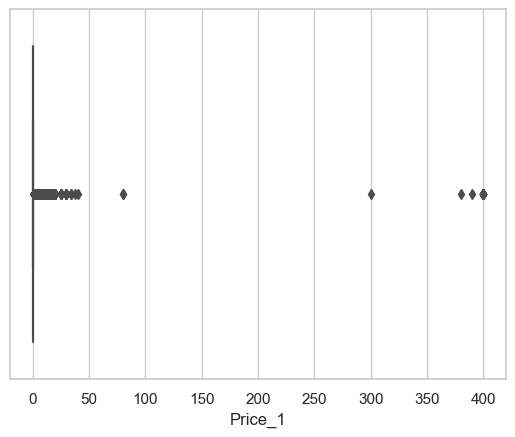

In [57]:
sns.set(style="whitegrid")
sns.boxplot(x=inp2["Price_1"])

#### Box plot for Reviews
o	Are there any apps with very high number of reviews? Do the values seem right?


<AxesSubplot:xlabel='Reviews_1'>

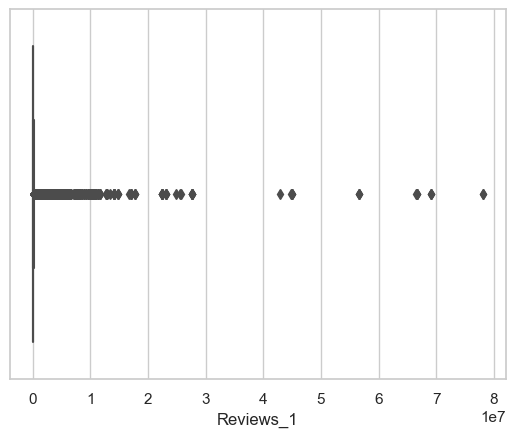

In [58]:
sns.boxplot(x=inp2["Reviews_1"])

In [59]:
max(inp2.Reviews_1)

78158306

In [60]:
inp2[['Reviews_1']].idxmax()

Reviews_1    2544
dtype: int64

In [61]:
inp2.loc[2544]

App                         Facebook
Category                      SOCIAL
Rating                           4.1
Reviews                     78158306
Size              Varies with device
Installs              1,000,000,000+
Type                            Free
Price                              0
Content Rating                  Teen
Genres                        Social
Last Updated          August 3, 2018
Current Ver       Varies with device
Android Ver       Varies with device
Size_1                              
Size_2                              
Size_3                           NaN
Size_4                           NaN
Size_5                  23746.316635
Reviews_1                   78158306
Installs_1                1000000000
Price_1                          0.0
rev_in                         False
Name: 2544, dtype: object

#### My Inference: The highest reviews seem to be of Facebook app, which is widely used across all age groups and domains, so they seem to be right.

#### Histogram for Rating
o	How are the ratings distributed? Is it more toward higher ratings?


(array([  17.,   18.,   41.,   74.,  137.,  445.,  879., 1660., 4172.,
        1910.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

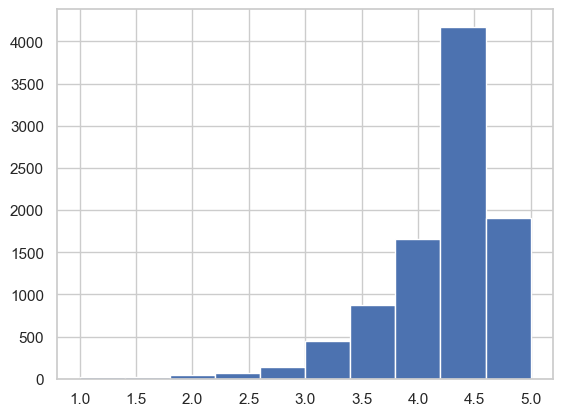

In [62]:
plt.hist(inp2['Rating'])

#### Ratings are more toward higher ratings, but peak at 4.5.

#### Histogram of Size

(array([2988., 1398., 2884.,  606.,  449.,  325.,  226.,  161.,  117.,
         199.]),
 array([  1000.,  10900.,  20800.,  30700.,  40600.,  50500.,  60400.,
         70300.,  80200.,  90100., 100000.]),
 <BarContainer object of 10 artists>)

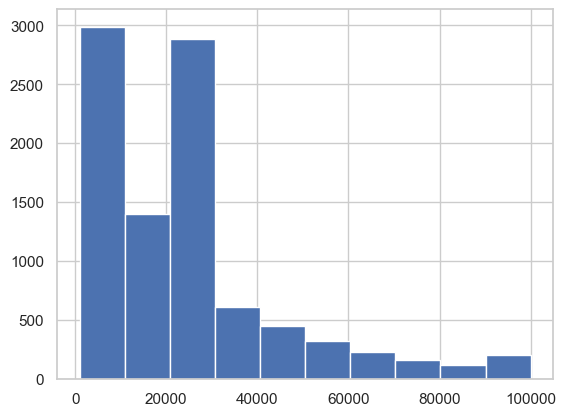

In [63]:
plt.hist(inp2['Size_5'])

## 6. Outlier treatment: 
1.	Price: From the box plot, it seems like there are some apps with very high price. A price of $200 for an application on the Play Store is very high and suspicious!
    a.	Check out the records with very high price
        i.	Is 200 indeed a high price?
    b.	Drop these as most seem to be junk apps
2.	Reviews: Very few apps have very high number of reviews. These are all star apps that don’t help with the analysis and, in fact, will skew it. Drop records having more than 2 million reviews.
3.	Installs:  There seems to be some outliers in this field too. Apps having very high number of installs should be dropped from the analysis.
        a.	Find out the different percentiles – 10, 25, 50, 70, 90, 95, 99
        b.	Decide a threshold as cutoff for outlier and drop records having values more than that


#### 6.1.	Price: From the box plot, it seems like there are some apps with very high price. A price of $200 for an application on the Play Store is very high and suspicious!
    a.	Check out the records with very high price
        i.	Is 200 indeed a high price?
    b.	Drop these as most seem to be junk apps

#### 6.1.a) Check out the records with very high price.

In [66]:
# check fo rhow many rows Price > 200?
filtered_inp2=inp2[inp2['Price_1']>200]
inp2_rows=len(filtered_inp2)
print("No. of rows: ",inp2_rows)

No. of rows:  15


#### 6.1.b) Drop these as most seem to be junk apps.

In [68]:
max(inp2['Price_1'])

400.0

In [69]:
inp3 = inp2[inp2['Price_1'] <= 200.00 ]

In [70]:
max(inp3['Price_1'])

79.99

#### 6.2	Reviews: Very few apps have very high number of reviews. These are all star apps that don’t help with the analysis and, in fact, will skew it. Drop records having more than 2 million reviews.

In [71]:
max(inp3['Reviews_1'])

78158306

In [75]:
inp4 = inp3[inp3['Reviews_1'] <= 2000000]

In [76]:
max(inp4['Reviews_1'])

1986068

#### 6.3	Installs:  There seems to be some outliers in this field too. Apps having very high number of installs should be dropped from the analysis.
        a.	Find out the different percentiles – 10, 25, 50, 70, 90, 95, 99
        b.	Decide a threshold as cutoff for outlier and drop records having values more than that

Dropping very high Installs values

In [78]:
inp4.Installs.quantile([0.1, 0.25, 0.5, 0.70, 0.9, 0.95, 0.99])

TypeError: unsupported operand type(s) for -: 'str' and 'str'

#### 6.3.a) Find out the different percentiles – 10, 25, 50, 70, 90, 95, 99.

In [77]:
print("10th Percentile\n", np.percentile(inp4['Installs_1'],q=10))

10th Percentile
 1000.0


In [79]:
print("25th Percentile\n", np.percentile(inp4['Installs_1'],q=25))

25th Percentile
 10000.0


In [80]:
print("50th Percentile\n", np.percentile(inp4['Installs_1'],q=50))

50th Percentile
 500000.0


In [81]:
print("70th Percentile\n", np.percentile(inp4['Installs_1'],q=70))

70th Percentile
 1000000.0


In [82]:
print("90th Percentile\n", np.percentile(inp4['Installs_1'],q=90))

90th Percentile
 10000000.0


In [83]:
print("95th Percentile\n", np.percentile(inp4['Installs_1'],q=95))

95th Percentile
 10000000.0


In [84]:
print("99th Percentile\n", np.percentile(inp4['Installs_1'],q=99))

99th Percentile
 100000000.0


Looks like there are just 1% apps having more than 100M installs. These apps might be genuine, but will definitely skew our analysis.  
We need to drop these.


In [91]:
# check how many row have installs greater than corresponding to 99 percentile.

install_threshold = inp4['Installs_1'].quantile(0.99)

# Filter rows where installs are greater than the threshold
filtered_df = inp4[inp4['Installs_1'] > install_threshold]

# Count the number of rows
num_rows = len(filtered_df)

print(f"Number of rows with installs greater than the 99th percentile: {num_rows}")


Number of rows with installs greater than the 99th percentile: 20


In [87]:
max(inp4['Installs_1'])

1000000000

In [98]:
# retain installs less than corresponding to 99 percentile. check shape
inp5 = inp4[inp4['Installs_1'] <= 10000000] #95th percentile
inp5.shape

(8496, 22)

In [99]:
max(inp5['Installs_1'])

10000000

## 7. Bivariate analysis: Let’s look at how the available predictors relate to the variable of interest, i.e., our target variable rating. Make scatter plots (for numeric features) and box plots (for character features) to assess the relations between rating and the other features.

    1.	Make scatter plot/joinplot for Rating vs. Price
        a.	What pattern do you observe? Does rating increase with price?
    2.	Make scatter plot/joinplot for Rating vs. Size
        a.	Are heavier apps rated better?
    3.	Make scatter plot/joinplot for Rating vs. Reviews
        a.	Does more review mean a better rating always?
    4.	Make boxplot for Rating vs. Content Rating
        a.	Is there any difference in the ratings? Are some types liked better?
    5.	Make boxplot for Ratings vs. Category
        a.	Which genre has the best ratings?

### For each of the plots above, note down your observation.


#### 7.1.	Make scatter plot/joinplot for Rating vs Price
    a.	What pattern do you observe? Does rating increase with price?


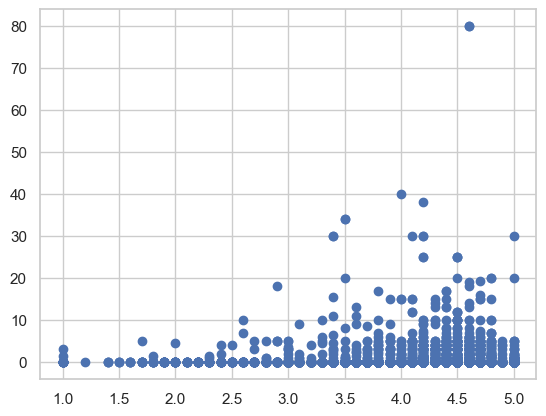

In [100]:
plt.scatter(x = inp5['Rating'],y = inp5['Price_1'])

#### Inference: From the above scatter plot, ratings seem to increase with price.

#### 7.2	Make scatter plot/joinplot for Rating vs Size
     a.	Are heavier apps rated better?


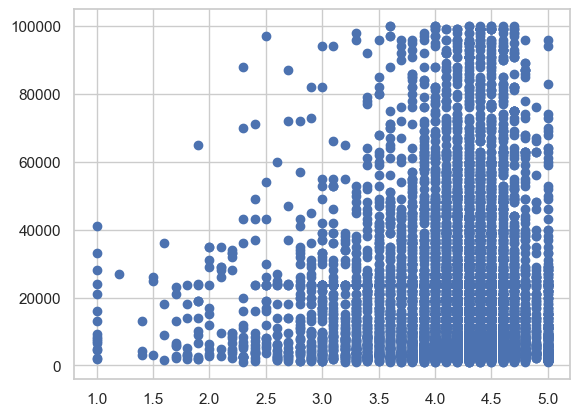

In [101]:
plt.scatter(x = inp5['Rating'],y = inp5['Size_5'])

#### Inference: Heavier apps seem to have a higher rating than lighter apps, but there are some lighter apps which have higher rating.

#### 7.3	Make scatter plot/joinplot for Rating vs Reviews
    a.	Does more review mean a better rating always?


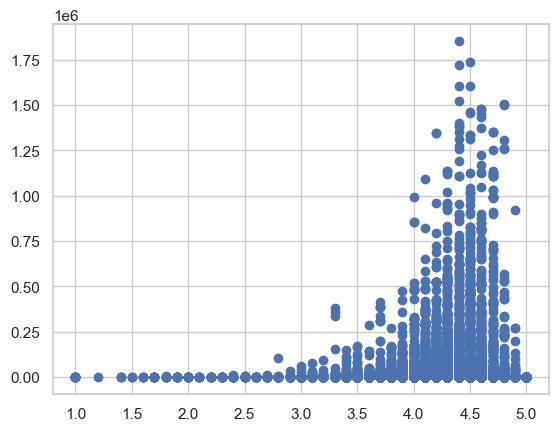

In [102]:
plt.scatter(x = inp5['Rating'],y = inp5['Reviews_1'])

#### Inference: From the scatter plot above it would appear that more reviews seem to be getting a better rating than lesser rated apps.

#### 7.4	Make boxplot for Rating vs Content Rating
    a.	Is there any difference in the ratings? Are some types liked better?

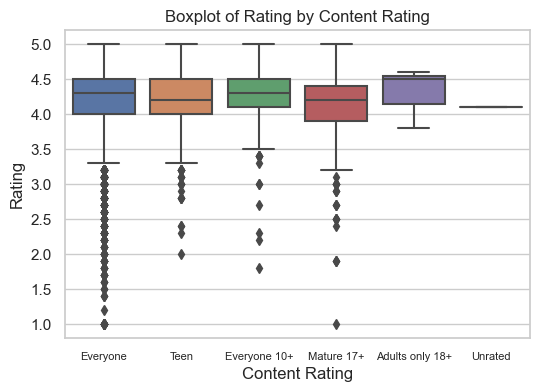

In [110]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=inp5, x='Content Rating', y='Rating')
plt.xlabel('Content Rating')
plt.ylabel('Rating')
plt.title('Boxplot of Rating by Content Rating')
plt.xticks(size=8)
plt.show()

#### Inference: Content ratings of 'Mature 17+' seems to enjoy popularity across all rating classes, after 'Everyone'.

#### 7.5	Make boxplot for Ratings vs. Category
    a.	Which genre has the best ratings?

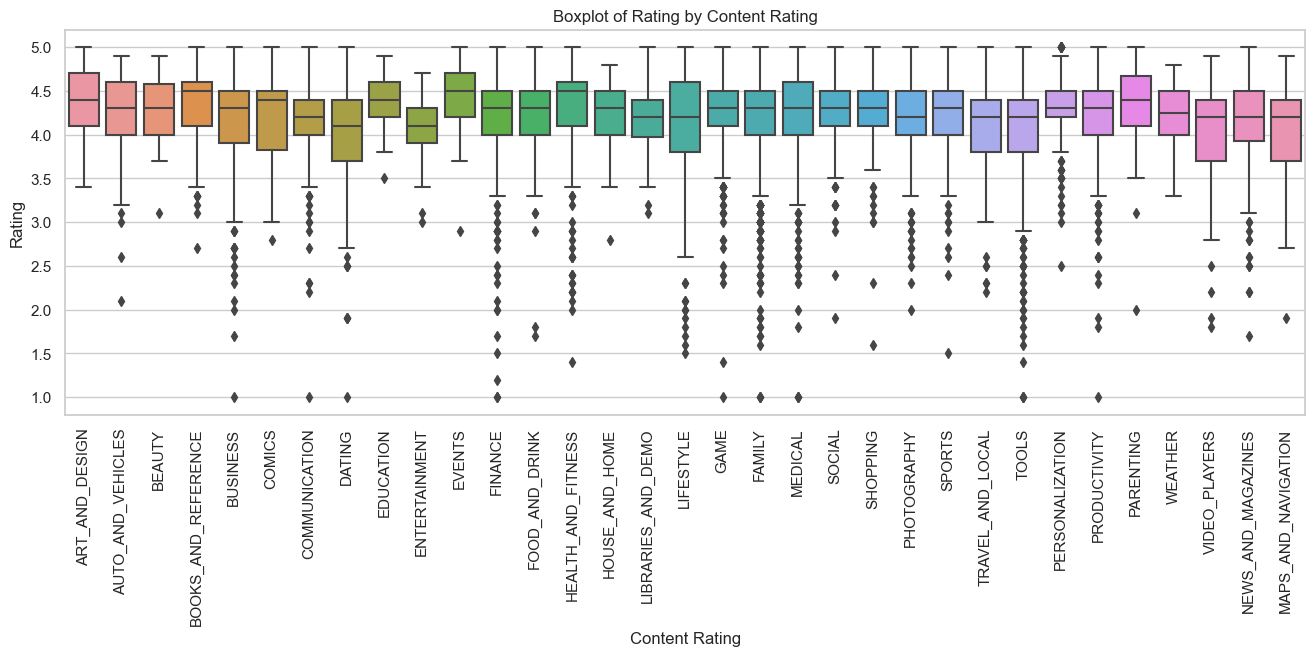

In [118]:
plt.figure(figsize=(16, 5))
sns.boxplot(data=inp5, x='Category', y='Rating')
plt.xlabel('Content Rating')
plt.ylabel('Rating')
plt.title('Boxplot of Rating by Content Rating')
plt.xticks(rotation=90)
plt.show()

#### Inference: According to the box plot, Tools and Lifestyle seems to have the best ratings, as in each rating class is populated.

## 8 Data preprocessing
For the steps below, create a copy of the dataframe to make all the edits. Name it inp1.
1.	Reviews and Install have some values that are still relatively very high. Before building a linear regression model, you need to reduce the skew. Apply log transformation (np.log1p) to Reviews and Installs.
2.	Drop columns App, Last Updated, Current Ver, and Android Ver. These variables are not useful for our task.
3.	Get dummy columns for Category, Genres, and Content Rating. This needs to be done as the models do not understand categorical data, and all data should be numeric. Dummy encoding is one way to convert character fields to numeric. Name of dataframe should be inp2.


**Making a copy of the dataset**

In [130]:
inp1 = inp5.copy()
inp1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,Android Ver,Size_1,Size_2,Size_3,Size_4,Size_5,Reviews_1,Installs_1,Price_1,rev_in
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,...,4.0.3 and up,19M,19,1000.0,19.0,19000.0,159,10000,0.0,False
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,...,4.0.3 and up,14M,14,1000.0,14.0,14000.0,967,500000,0.0,False
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,...,4.0.3 and up,8.7M,8.7,1000.0,8.7,8700.0,87510,5000000,0.0,False
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,...,4.4 and up,2.8M,2.8,1000.0,2.8,2800.0,967,100000,0.0,False
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,...,2.3 and up,5.6M,5.6,1000.0,5.6,5600.0,167,50000,0.0,False


#### 8.1	Reviews and Install have some values that are still relatively very high. Before building a linear regression model, you need to reduce the skew. Apply log transformation (np.log1p) to Reviews and Installs.

In [131]:
inp1['Reviews_2'] = np.log1p(inp1['Reviews_1'])
inp1['Reviews_2'].head()

0     5.075174
1     6.875232
2    11.379520
4     6.875232
5     5.123964
Name: Reviews_2, dtype: float64

In [132]:
inp1['Installs_2'] = np.log1p(inp1['Installs_1'])
inp1['Installs_2'].head()

0     9.210440
1    13.122365
2    15.424949
4    11.512935
5    10.819798
Name: Installs_2, dtype: float64

In [133]:
inp1['Size_5'] = np.log1p(inp1['Size_5'])
inp1['Size_5'].head()

0    9.852247
1    9.546884
2    9.071193
4    7.937732
5    8.630700
Name: Size_5, dtype: float64

#### 8.2	Drop columns App, Last Updated, Current Ver, and Android Ver. These variables are not useful for our task.

In [140]:
inp6=inp1.drop(columns=["Reviews_1","Installs_1"])

In [141]:
inp6.head(1)

,Category,Rating,Content Rating,Genres,Size_5,Price_1,Reviews_2,Installs_2
0,ART_AND_DESIGN,4.1,Everyone,Art & Design,9.852247,0.0,5.075174,9.21044


In [142]:
inp7 = inp6.rename(columns={'Size_5':'Size','Price_1':'Price','Reviews_2':'Reviews','Installs_2':'Installs'})

In [143]:
inp6 = inp7[['Rating','Category','Reviews','Size','Installs','Price','Content Rating','Genres']]
inp6.head(1)

,Rating,Category,Reviews,Size,Installs,Price,Content Rating,Genres
0,4.1,ART_AND_DESIGN,5.075174,9.852247,9.21044,0.0,Everyone,Art & Design


In [144]:
inp6.isnull().sum()

Rating            0
Category          0
Reviews           0
Size              0
Installs          0
Price             0
Content Rating    0
Genres            0
dtype: int64

In [145]:
inp6.dtypes

Rating            float64
Category           object
Reviews           float64
Size              float64
Installs          float64
Price             float64
Content Rating     object
Genres             object
dtype: object

In [146]:
inp6.replace([np.inf, -np.inf], np.nan, inplace=True)
inp6.fillna(1, inplace=True)

#### 8.3	Get dummy columns for Category, Genres, and Content Rating. This needs to be done as the models do not understand categorical data, and all data should be numeric. Dummy encoding is one way to convert character fields to numeric. Name of dataframe should be inp2.

Getting dummy variables for Category, Genres, Content Rating

In [147]:
inp6.head(1)

,Rating,Category,Reviews,Size,Installs,Price,Content Rating,Genres
0,4.1,ART_AND_DESIGN,5.075174,9.852247,9.21044,0.0,Everyone,Art & Design


In [148]:
inp6['Category'].value_counts()

FAMILY                 1663
GAME                    842
TOOLS                   673
MEDICAL                 349
FINANCE                 311
LIFESTYLE               306
SPORTS                  305
BUSINESS                293
PERSONALIZATION         290
HEALTH_AND_FITNESS      290
PRODUCTIVITY            285
PHOTOGRAPHY             248
COMMUNICATION           243
NEWS_AND_MAGAZINES      222
SOCIAL                  213
SHOPPING                208
TRAVEL_AND_LOCAL        205
DATING                  195
BOOKS_AND_REFERENCE     171
EDUCATION               151
VIDEO_PLAYERS           135
ENTERTAINMENT           133
MAPS_AND_NAVIGATION     118
FOOD_AND_DRINK          109
HOUSE_AND_HOME           76
AUTO_AND_VEHICLES        73
WEATHER                  70
LIBRARIES_AND_DEMO       64
ART_AND_DESIGN           60
COMICS                   58
PARENTING                50
EVENTS                   45
BEAUTY                   42
Name: Category, dtype: int64

In [53]:
# check types

App                object
Category           object
Rating            float64
Reviews           float64
Size              float64
Installs          float64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [150]:
inp7 = pd.get_dummies(inp6, drop_first=True)
inp7.head()

,Rating,Reviews,Size,Installs,Price,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,...,Genres_Tools,Genres_Tools;Education,Genres_Travel & Local,Genres_Travel & Local;Action & Adventure,Genres_Trivia,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word
0,4.1,5.075174,9.852247,9.210440,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.9,6.875232,9.546884,13.122365,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.7,11.379520,9.071193,15.424949,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.3,6.875232,7.937732,11.512935,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4.4,5.123964,8.630700,10.819798,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
# display col names

Index(['Rating', 'Reviews', 'Size', 'Installs', 'Price',
       'Category_AUTO_AND_VEHICLES', 'Category_BEAUTY',
       'Category_BOOKS_AND_REFERENCE', 'Category_BUSINESS', 'Category_COMICS',
       ...
       'Genres_Tools', 'Genres_Tools;Education', 'Genres_Travel & Local',
       'Genres_Travel & Local;Action & Adventure', 'Genres_Trivia',
       'Genres_Video Players & Editors',
       'Genres_Video Players & Editors;Creativity',
       'Genres_Video Players & Editors;Music & Video', 'Genres_Weather',
       'Genres_Word'],
      dtype='object', length=157)

In [151]:
inp7.shape

(8496, 156)

## 9. Train test split  and apply 70-30 split. Name the new dataframes df_train and df_test.

Train - test split

In [153]:
from sklearn.model_selection import train_test_split

In [159]:
df_train = inp7
df_test = inp7.drop(['Rating'],axis=1)

## 10. Separate the dataframes into X_train, y_train, X_test, and y_test.

In [160]:
x = df_train.drop(columns = ['Rating'])
y = df_train['Rating']

In [161]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=100)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5947, 155)
(2549, 155)
(5947,)
(2549,)


# Build various models and compare

## 11 . Model building

In [163]:
from sklearn.linear_model import LinearRegression

In [165]:
model = LinearRegression(n_jobs=-1)
model.fit(x_train,y_train)

LinearRegression(n_jobs=-1)

In [166]:
print(model.intercept_)
print(model.coef_)

4.254312888336138
[ 1.75940508e-01 -1.69014302e-02 -1.54375657e-01 -8.04037595e-03
  1.30151502e-01  2.19151619e-01  1.90668271e-01  8.90112599e-02
  3.76427107e-01  5.00305618e-02  2.55066855e-02 -5.42619441e-02
 -1.44561946e-01  2.59427174e-01 -1.55371421e-02  6.71298206e-02
  9.83086035e-02  1.75572809e-01  1.22003013e-01  1.28668794e-01
  1.52645648e-01  6.16234075e-02  2.67626432e-02  1.38253970e-01
  9.01907820e-02  2.52827639e-01  1.58387598e-01  7.92661938e-02
  9.50854597e-02  1.21704396e-01  9.41228710e-02 -4.60303997e-02
  1.50995694e-01  1.59997384e-01 -1.55404488e-02  1.16492184e-01
  3.22181725e-01  3.22737776e-01  2.88040791e-01  3.32204502e-01
 -3.66373598e-15  2.83300279e-01 -1.26439917e-01  9.42392076e-02
  4.31084649e-01  8.41673755e-03 -1.08036524e-03  3.00305005e-01
  4.92731040e-01  5.39156805e-01  4.66271672e-01  3.08138049e-01
  1.30151502e-01  2.19151619e-01  2.90483445e-02  1.12150600e-01
  3.36797232e-01  8.56222749e-01  1.90668271e-01  6.84876795e-01
  8.901

In [167]:
print(df_train.columns.values.tolist())

['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Category_AUTO_AND_VEHICLES', 'Category_BEAUTY', 'Category_BOOKS_AND_REFERENCE', 'Category_BUSINESS', 'Category_COMICS', 'Category_COMMUNICATION', 'Category_DATING', 'Category_EDUCATION', 'Category_ENTERTAINMENT', 'Category_EVENTS', 'Category_FAMILY', 'Category_FINANCE', 'Category_FOOD_AND_DRINK', 'Category_GAME', 'Category_HEALTH_AND_FITNESS', 'Category_HOUSE_AND_HOME', 'Category_LIBRARIES_AND_DEMO', 'Category_LIFESTYLE', 'Category_MAPS_AND_NAVIGATION', 'Category_MEDICAL', 'Category_NEWS_AND_MAGAZINES', 'Category_PARENTING', 'Category_PERSONALIZATION', 'Category_PHOTOGRAPHY', 'Category_PRODUCTIVITY', 'Category_SHOPPING', 'Category_SOCIAL', 'Category_SPORTS', 'Category_TOOLS', 'Category_TRAVEL_AND_LOCAL', 'Category_VIDEO_PLAYERS', 'Category_WEATHER', 'Content Rating_Everyone', 'Content Rating_Everyone 10+', 'Content Rating_Mature 17+', 'Content Rating_Teen', 'Content Rating_Unrated', 'Genres_Action;Action & Adventure', 'Genres_Adventur

In [168]:
list(zip(df_train.columns,model.coef_))

[('Rating', 0.17594050772120676),
 ('Reviews', -0.016901430192898775),
 ('Size', -0.1543756573459671),
 ('Installs', -0.00804037595240463),
 ('Price', 0.13015150157554042),
 ('Category_AUTO_AND_VEHICLES', 0.2191516190176059),
 ('Category_BEAUTY', 0.1906682705972345),
 ('Category_BOOKS_AND_REFERENCE', 0.08901125993065362),
 ('Category_BUSINESS', 0.3764271072923399),
 ('Category_COMICS', 0.050030561783182825),
 ('Category_COMMUNICATION', 0.025506685462467968),
 ('Category_DATING', -0.05426194405008303),
 ('Category_EDUCATION', -0.14456194610384618),
 ('Category_ENTERTAINMENT', 0.2594271739105802),
 ('Category_EVENTS', -0.015537142050949249),
 ('Category_FAMILY', 0.06712982059658165),
 ('Category_FINANCE', 0.09830860349727914),
 ('Category_FOOD_AND_DRINK', 0.17557280929227181),
 ('Category_GAME', 0.1220030128200244),
 ('Category_HEALTH_AND_FITNESS', 0.12866879360418315),
 ('Category_HOUSE_AND_HOME', 0.15264564848926662),
 ('Category_LIBRARIES_AND_DEMO', 0.06162340753690656),
 ('Category_L

In [169]:
predictors = df_train.columns.drop(['Rating'])
predictors

Index(['Reviews', 'Size', 'Installs', 'Price', 'Category_AUTO_AND_VEHICLES',
       'Category_BEAUTY', 'Category_BOOKS_AND_REFERENCE', 'Category_BUSINESS',
       'Category_COMICS', 'Category_COMMUNICATION',
       ...
       'Genres_Tools', 'Genres_Tools;Education', 'Genres_Travel & Local',
       'Genres_Travel & Local;Action & Adventure', 'Genres_Trivia',
       'Genres_Video Players & Editors',
       'Genres_Video Players & Editors;Creativity',
       'Genres_Video Players & Editors;Music & Video', 'Genres_Weather',
       'Genres_Word'],
      dtype='object', length=155)

In [170]:
coef = pd.Series(model.coef_,predictors).sort_values()
coef

Genres_Music                         -0.219763
Genres_Parenting;Brain Games         -0.201062
Genres_Comics                        -0.200432
Genres_Trivia                        -0.171133
Installs                             -0.154376
                                        ...   
Genres_Books & Reference;Education    0.684877
Genres_Puzzle;Education               0.801727
Genres_Strategy;Education             0.801976
Genres_Board;Pretend Play             0.856223
Genres_Racing;Pretend Play            0.906932
Length: 155, dtype: float64

In [181]:
print('R2 value/Coefficient of Determination: {}'.format(model.score(x_test,y_test)))

R2 value/Coefficient of Determination: 0.14479358079758098


## 12. Make predictions on test set and report R2.

In [180]:
model.predict(x_test)

array([4.15891199, 4.18914047, 4.13499755, ..., 4.3586473 , 3.93778032,
       4.07657547])

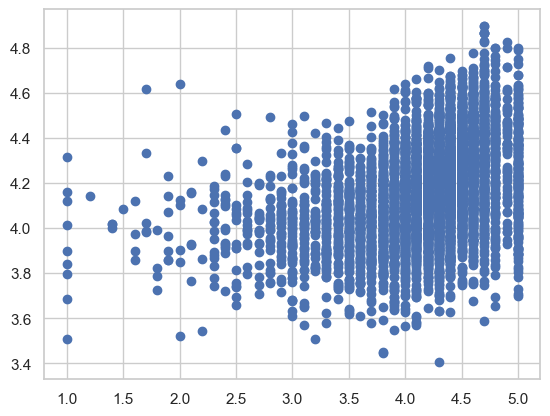

In [182]:
plt.scatter(y_train,model.predict(x_train))

In [189]:
from math import sqrt
from sklearn.metrics import mean_squared_error

In [190]:
print(sqrt(mean_squared_error(y_train,model.predict(x_train))))

0.4821971011940631


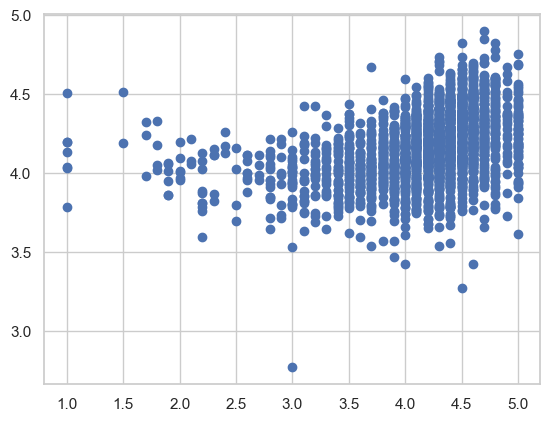

In [191]:
plt.scatter(y_test,model.predict(x_test))

In [192]:
print(sqrt(mean_squared_error(y_test,model.predict(x_test))))

0.5067082702686576


#### <u>Inference:</u> The error in x_test prediction (0.5067) is more than x_train prediction (0.4821) but marginally. Hence the model is acceptable, with a slight chance of overfitting.

In [195]:
pd.DataFrame({'Actual':y_test,'Predicted':model.predict(x_test)}).head(10)

,Actual,Predicted
1538,4.6,4.158912
8940,4.5,4.189140
2628,4.3,4.134998
5665,3.6,3.945022
6342,5.0,4.504631
9792,4.2,4.104212
2672,4.4,4.315020
10440,4.5,4.093107
580,4.1,3.749269
8216,2.7,3.951102


# <u>The Project ends here! THANK YOU!!!</u>